In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from pandas import datetools
import quandl
import seaborn as sns
authtoken="AmT6hbzjx59sQAvKde2L"
from sklearn.preprocessing import minmax_scale
import datetime

%matplotlib inline

In [3]:
start_date = datetime.date(1903, 11, 1)
end_date = datetime.date(2018, 3, 31)
yale = quandl.get("YALE/SPCOMP", start_date = start_date, end_date = end_date, authtoken=authtoken)

In [4]:
yale.columns = ['sp_comp','dividend', 'earnings', 'cpi', 'long_int_rate',
       'real_price', 'real_dividend', 'real_earnings',
       'cape']
yale.index.names = ['date']


In [5]:
bull_start = [
#     datetime.date(1903, 11, 1),
#     datetime.date(1907, 11, 1),
#     datetime.date(1917, 12, 1),
    datetime.date(1921, 8, 1),
    datetime.date(1932, 6, 1),
    datetime.date(1947, 5, 1),
    datetime.date(1962, 6, 1),
    datetime.date(1970, 6, 1),
    datetime.date(1974, 12, 1),
    datetime.date(1987, 12, 1),
    datetime.date(2003, 2, 1),
    datetime.date(2009, 3, 1),
]

bull_end = [
#     datetime.date(1906, 9, 1),
#     datetime.date(1916, 11, 1),
#     datetime.date(1919, 10, 1),
    datetime.date(1929, 9, 1),
    datetime.date(1946, 5, 1),
    datetime.date(1961, 12, 1),
    datetime.date(1968, 12, 1),
    datetime.date(1973, 1, 1),
    datetime.date(1987, 8, 1),
    datetime.date(2000, 8, 1),
    datetime.date(2007, 10, 1),
    datetime.date(2018, 3, 1),
]

In [6]:
bull_dates = list(zip(bull_start, bull_end))
bull_dates = pd.Series(bull_dates)
bear_dates = list(zip(bull_end, bull_start[1:]))
bear_dates = pd.Series(bear_dates)

In [7]:
yale = yale.resample('QS').last()

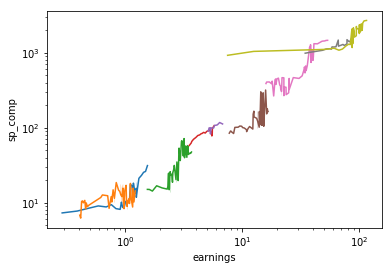

In [8]:
for i in range(0,len(bull_dates)):
    data = yale.loc[bull_dates[i][0]:bull_dates[i][1],:]
#     earnings = np.array(data.earnings)
#     earnings = earnings.reshape(-1,1)
#     prices = np.array(data.sp_comp)
#     prices = prices.reshape(-1,1)
#     data.earnings = minmax_scale(earnings)
#     data.sp_comp = minmax_scale(prices)
    g = sns.lineplot(x ='earnings', y='sp_comp', data=data)
    ax = g.axes
    ax.set_xscale('log')
    ax.set_yscale('log')

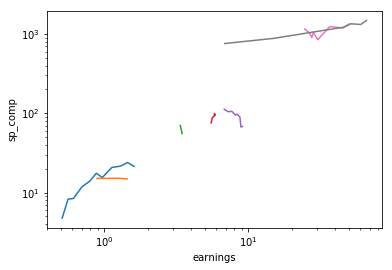

In [9]:
for i in range(0,len(bear_dates)):
    data = yale.loc[bear_dates[i][0]:bear_dates[i][1],:]
#     earnings = np.array(data.earnings)
#     earnings = earnings.reshape(-1,1)
#     prices = np.array(data.sp_comp)
#     prices = prices.reshape(-1,1)
#     data.earnings = minmax_scale(earnings)
#     data.sp_comp = minmax_scale(prices)
    g = sns.lineplot(x ='earnings', y='sp_comp', data=data)
    ax = g.axes
    ax.set_xscale('log')
    ax.set_yscale('log')

In [10]:
def Drawdown(series):
    running_max = series.expanding(1).max()
    dd = (series - running_max)/running_max
    return dd

dd = Drawdown(yale.sp_comp)
# plt.plot(dd<=-0.2)
# plt.plot(dd[dd<=-0.2])
# plt.plot(yale.sp_comp)

In [11]:
a = dd<= - 0.2
a = a * 1
a = a.diff()
yale['low_close'] = 0
low_closeloc = 0
low_close = yale.sp_comp[0]
for n in range(len(yale.sp_comp)):
    if a[n] == 1:
        start = yale.sp_comp[n]
        yale.low_close[low_closeloc] = 1
        low_close = start
    elif yale.sp_comp[n] < low_close:
        low_close = yale.sp_comp[n]
        low_closeloc = n

C:\Users\Beau\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


C:\Users\Beau\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


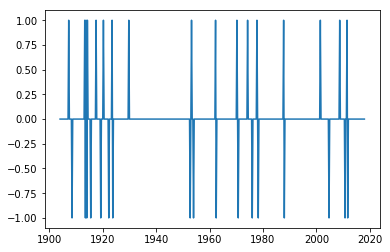

In [12]:
plt.plot(a)

In [13]:
recalc_dates = yale.loc[yale.low_close==True].index
dates = []
for i in range(1,len(recalc_dates)):
    dates.append(tuple([recalc_dates[i-1],recalc_dates[i]]))
dates = pd.DataFrame(dates)
bull_dates = dates.iloc[::2]
bear_dates= dates.iloc[1::2]
print(dates)
print(bull_dates)
print(bear_dates)

           0          1
0 1904-01-01 1907-10-01
1 1907-10-01 1914-10-01
2 1914-10-01 1917-10-01
3 1917-10-01 1921-04-01
4 1921-04-01 1932-04-01
5 1932-04-01 1953-07-01
6 1953-07-01 1974-10-01
7 1974-10-01 1978-01-01
8 1978-01-01 2003-01-01
9 2003-01-01 2009-01-01
           0          1
0 1904-01-01 1907-10-01
2 1914-10-01 1917-10-01
4 1921-04-01 1932-04-01
6 1953-07-01 1974-10-01
8 1978-01-01 2003-01-01
           0          1
1 1907-10-01 1914-10-01
3 1917-10-01 1921-04-01
5 1932-04-01 1953-07-01
7 1974-10-01 1978-01-01
9 2003-01-01 2009-01-01


In [19]:
# Standard plotly imports
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
# Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

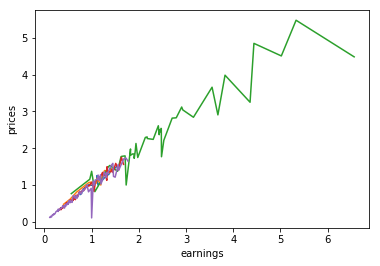

In [14]:
for i in range(0,len(bull_dates)):
    data = yale.loc[bull_dates.iloc[i,0]:bull_dates.iloc[i,1],:]
    earnings = np.array(data.earnings)
    earnings = earnings.reshape(-1,1)
    prices = np.array(data.sp_comp)
    prices = prices.reshape(-1,1)
    earnings_scaled = earnings/earnings[-1]
    prices_scaled = prices/prices[-1]
#     earnings_scaled = minmax_scale(earnings)
#     prices_scaled = minmax_scale(prices)
    data_scaled = pd.DataFrame(data=np.array([earnings_scaled,prices_scaled]).reshape(-1,2), columns=['earnings','prices'], index=data.index)
    g = sns.lineplot(x ='earnings', y='prices', data=data_scaled)

C:\Users\Beau\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Beau\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
C:\Users\Beau\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.py

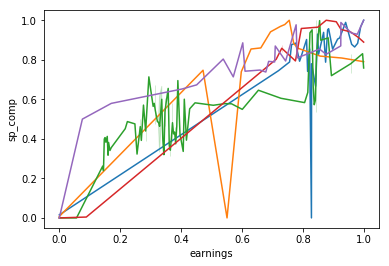

In [24]:
for i in range(0,len(bear_dates)):
    data = yale.loc[bear_dates.iloc[i,0]:bear_dates.iloc[i,1],:]
    earnings = np.array(data.earnings)
    earnings = earnings.reshape(-1,1)
    prices = np.array(data.sp_comp)
    prices = prices.reshape(-1,1)
    data.earnings = minmax_scale(earnings)
    data.sp_comp = minmax_scale(prices)
    g = sns.lineplot(x ='earnings', y='sp_comp', data=data)

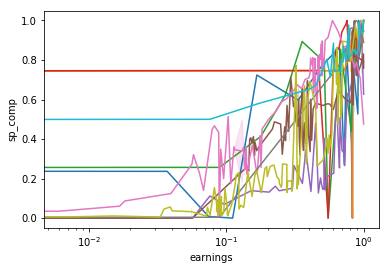

In [25]:
for i in range(1,len(recalc_dates)):
    data = yale.loc[recalc_dates[i-1]:recalc_dates[i],:]
#     earnings = np.array(data.earnings)
#     earnings = earnings.reshape(-1,1)
#     prices = np.array(data.sp_comp)
#     prices = prices.reshape(-1,1)
#     data.earnings = minmax_scale(earnings)
#     data.sp_comp = minmax_scale(prices)
    g = sns.lineplot(x ='earnings', y='sp_comp', data=data)
    ax = g.axes
    ax.set_xscale('log')

In [ ]:
plt.plot(yale.cape.expanding(12).mean())
sd = yale.cape.expanding(12).std()
plt.plot(yale.cape.expanding(12).mean() - sd)
plt.plot(yale.cape.expanding(12).mean() + sd)
plt.plot(yale.cape)

In [ ]:
plt.hlines(yale.cape.mean(),yale.cape.index[0],yale.cape.index[-1])
sd = yale.cape.std()
plt.hlines(yale.cape.mean() - sd, yale.cape.index[0],yale.cape.index[-1], linestyles='dashed')
plt.hlines(yale.cape.mean() + sd, yale.cape.index[0],yale.cape.index[-1], linestyles='dashed')
plt.plot(yale.cape)